Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = 'Jason Ehlenberger'
COLLABORATORS = 'N/A'

---

# Assignment 2:

1) Create zonal statistics (basically the whole step) for these datasets:   
counties_subset_Albers4.shp   
crop_cover_2019.tif
2) In the zonal statistics, only include these crops: 1, 5, 6, 23, 24, 26, 225,226, 236, 237, 238, 240, 241, 254.
3) From the zonal stat table, delete column "sum".
4) What is the unit of the zonal statistics result? 

What does the crop_2018_subset represent:   
1:Corn, 5:Soybeans, 6:Sunflower, 23:Spring Wheat, 24:Winter Wheat, 26:Dbl Crop WinWht/Soybeans   
225:Dbl Crop WinWht/Corn, 226:Dbl Crop Oats/Corn, 236:Dbl Cropp WinWht/Sorghum, 237:Dbl Crop Barley/Corn,    
238:Dbl Crop WinWht/Cotten, 240:Dbl Crop Soybeans/Oats, 241:bl Crop Corn/Soybeans, 254: Dbl Crop Barley/Soybeans,    
To inlcude: 1, 5, 6, 23, 24, 26, 225,226, 236, 237, 238, 240, 241, 254   

In [2]:
# This is my custom import helper function
import importlib

def import_helper(items):
    for item in items:
        try:
            if isinstance(item, tuple) and len(item) == 2:
                module_name, alias = item
                module = importlib.import_module(module_name)
                globals()[alias] = module   # Store the module, not an attribute
            else:
                globals()[item] = importlib.import_module(item)
            print(f'The {item} is installed.')
        except ImportError:
            print(f'The {item} is not installed.')


In [3]:
# Using the helper function:
import_helper(['os',
               ('zipfile', 'zp'),
               ('numpy', 'np'),
               ('pandas', 'pd'),
               ('seaborn', 'sns'),
               ('geopandas', 'gpd'),
               ('matplotlib.pyplot', 'plt'),
               'rasterio',
               ('rasterstats', 'zonal_stats')])

The os is installed.
The ('zipfile', 'zp') is installed.
The ('numpy', 'np') is installed.
The ('pandas', 'pd') is installed.
The ('seaborn', 'sns') is installed.
The ('geopandas', 'gpd') is installed.
The ('matplotlib.pyplot', 'plt') is installed.
The rasterio is installed.
The ('rasterstats', 'zonal_stats') is installed.


In [4]:
# pip install rasterstats

In [5]:
fn = 'counties_subset_Albers4.shp'
data = gpd.read_file(fn)
data.head

<bound method NDFrame.head of   STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID        NAME LSAD  \
0      20      001  00484970  0500000US20001  20001       Allen   06   
1      20      037  00484988  0500000US20037  20037    Crawford   06   
2      20      125  00485027  0500000US20125  20125  Montgomery   06   
3      20      021  00484980  0500000US20021  20021    Cherokee   06   
4      20      205  00485063  0500000US20205  20205      Wilson   06   
5      20      133  00485030  0500000US20133  20133      Neosho   06   
6      20      207  00485064  0500000US20207  20207     Woodson   06   
7      20      011  00484975  0500000US20011  20011     Bourbon   06   
8      20      099  00485014  0500000US20099  20099     Labette   06   

        ALAND    AWATER                                           geometry  
0  1295763786  13022381  POLYGON ((41438.116 1634609.881, 41463.125 163...  
1  1527498199  13574680  POLYGON ((79758.943 1613697.800, 79759.066 161...  
2  1666900068  204

In [6]:
data.info

<bound method DataFrame.info of   STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID        NAME LSAD  \
0      20      001  00484970  0500000US20001  20001       Allen   06   
1      20      037  00484988  0500000US20037  20037    Crawford   06   
2      20      125  00485027  0500000US20125  20125  Montgomery   06   
3      20      021  00484980  0500000US20021  20021    Cherokee   06   
4      20      205  00485063  0500000US20205  20205      Wilson   06   
5      20      133  00485030  0500000US20133  20133      Neosho   06   
6      20      207  00485064  0500000US20207  20207     Woodson   06   
7      20      011  00484975  0500000US20011  20011     Bourbon   06   
8      20      099  00485014  0500000US20099  20099     Labette   06   

        ALAND    AWATER                                           geometry  
0  1295763786  13022381  POLYGON ((41438.116 1634609.881, 41463.125 163...  
1  1527498199  13574680  POLYGON ((79758.943 1613697.800, 79759.066 161...  
2  1666900068  2

In [7]:
data.crs

<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
# data2 = data.to_crs(epsg=####)

In [9]:
data.describe()

,ALAND,AWATER
count,9.000000e+00,9.000000e+00
mean,1.508468e+09,1.478210e+07
std,1.441116e+08,4.428978e+06
min,1.289344e+09,8.951473e+06
25%,1.477382e+09,1.205225e+07
50%,1.521791e+09,1.357468e+07
75%,1.645862e+09,1.925456e+07
max,1.671560e+09,2.043002e+07


<Axes: >

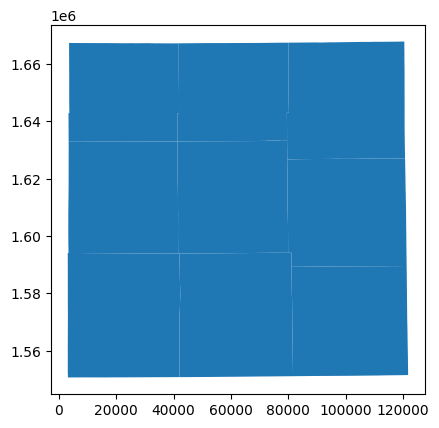

In [10]:
data.plot()

In [11]:
'''# output file 
outfp = "test_out.shp"
data.to_file(outfp)
'''

'# output file \noutfp = "test_out.shp"\ndata.to_file(outfp)\n'

In [12]:
'''
Pandas.to_datetime
# New column called date in dt format
'''

'\nPandas.to_datetime\n# New column called date in dt format\n'

In [13]:
raster = rasterio.open('crop_cover_2019.tif')

In [14]:
type(raster)

rasterio.io.DatasetReader

In [15]:
raster.crs

CRS.from_epsg(5070)

In [16]:
# raster.head()

In [17]:
with rasterio.open('crop_cover_2019.tif') as raster_crop:
    crop_val = raster_crop.read()
crop_val

array([[[176, 176, 176, ...,   1,   5,   5],
        [176, 176, 176, ..., 176,  26, 141],
        [176, 176, 176, ...,   1, 141,   1],
        ...,
        [176, 121, 121, ..., 141, 121, 141],
        [121, 121, 176, ..., 176, 121, 141],
        [176, 176, 176, ..., 141, 121, 141]]], dtype=uint8)

In [18]:
# Packages 
from rasterio.warp import calculate_default_transform, reproject, Resampling

In [19]:
raster.bounds

BoundingBox(left=-30012.21913293552, bottom=1544807.0280387579, right=154937.7808670645, top=1673717.0280387579)

In [20]:
# Raster resolution 
print(raster.crs.linear_units)

metre


In [21]:
dst_crs = 'EPSG:9712'

In [22]:
# step 1: Calculate transform array and shape of reprojected raster 
with rasterio.open('crop_cover_2019.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)